In [2]:
import pykitti
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from PIL import Image
import glob
import os

from ip_basic import depth_map_utils

In [3]:
basedir = "/media/bigdrive/cecilia/datasets/kitti/train/"

In [4]:
def depth_read(filename):
    # loads depth map D from png file
    # and returns it as a numpy array,
    # for details see readme.txt

    depth_png = np.array(Image.open(filename), dtype=int)
    # make sure we have a proper 16bit depth map here.. not 8bit!
    assert(np.max(depth_png) > 255)

    depth = depth_png.astype(np.float) / 256.
    depth[depth_png == 0] = 0
    return depth

In [5]:
def display(img):
    
    cmap: colors.Colormap = cm.get_cmap("jet")
    norm: colors.Normalize = colors.Normalize()
    # set min and max values from data
    norm.autoscale(img[img>0])

    # move scalar values to range [0, 1]
    # can skip and pass directly to cmap if data already [0, 1]
    normalised = norm(img)

    # create a RBGA array
    # bytes=True gives a uint8 array (Unsigned integer 0 to 255)
    data_rgba = cmap(normalised, bytes=True)
    # masks -1 values with white 
    data_rgba[np.tile(np.expand_dims(img, axis=2), [1,1,4]) <= 0] = 255
    plt.matshow(data_rgba)
    plt.colorbar()
    plt.show()
    return data_rgba

In [6]:

date = '2011_09_26'
drive = '0001'

# The 'frames' argument is optional - default: None, which loads the whole dataset.
# Calibration, timestamps, and IMU data are read automatically. 
# Camera and velodyne data are available via properties that create generators
# when accessed, or through getter methods that provide random access.
data = pykitti.raw(basedir, date, drive, frames=range(0, 50, 5))

# dataset.calib:         Calibration data are accessible as a named tuple
# dataset.timestamps:    Timestamps are parsed into a list of datetime objects
# dataset.oxts:          List of OXTS packets and 6-dof poses as named tuples
# dataset.camN:          Returns a generator that loads individual images from camera N
# dataset.get_camN(idx): Returns the image from camera N at idx  
# dataset.gray:          Returns a generator that loads monochrome stereo pairs (cam0, cam1)
# dataset.get_gray(idx): Returns the monochrome stereo pair at idx  
# dataset.rgb:           Returns a generator that loads RGB stereo pairs (cam2, cam3)
# dataset.get_rgb(idx):  Returns the RGB stereo pair at idx  
# dataset.velo:          Returns a generator that loads velodyne scans as [x,y,z,reflectance]
# dataset.get_velo(idx): Returns the velodyne scan at idx  

point_velo = np.array([0,0,0,1])
point_cam0 = data.calib.T_cam0_velo.dot(point_velo)

point_imu = np.array([0,0,0,1])
point_w = [o.T_w_imu.dot(point_imu) for o in data.oxts]

for cam0_image in data.cam0:
    # do something
    pass

cam2_image, cam3_image = data.get_rgb(3)

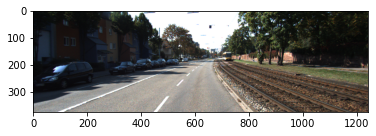

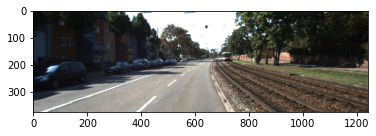

In [7]:
plt.figure()
plt.imshow(cam2_image)
plt.show()

plt.figure()
plt.imshow(cam3_image)
plt.show()

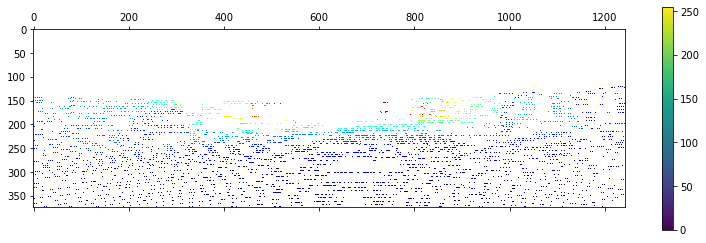

In [14]:
velo_path = "2011_09_26/2011_09_26_drive_0001_sync/proj_depth/velodyne_raw/image_02/0000000005.png"
velo_img = depth_read(basedir + velo_path)
#plt.imshow(velo_img)
vis = display(velo_img)

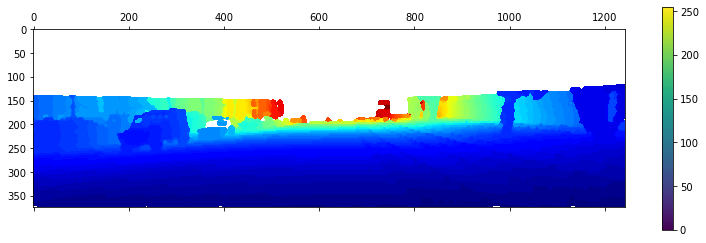

In [9]:
filled_depths = depth_map_utils.fill_in_fast(
                velo_img.astype(np.uint8), extrapolate=False, blur_type="bilateral")
vis = display(filled_depths)

In [19]:
velodine_img_list = glob.glob(basedir +'*/*/proj_depth/velodyne_raw/image_*/*.png')
velodine_pts_list = glob.glob(basedir + '*/*/velodyne_points/data/*.bin')
velodine_depth_list = glob.glob(basedir +'*/*/proj_depth/ip_complete/image_*/*.png')


In [20]:
len(velodine_img_list)

27624

In [21]:
len(velodine_pts_list)

38678

In [22]:
len(velodine_depth_list)

7547

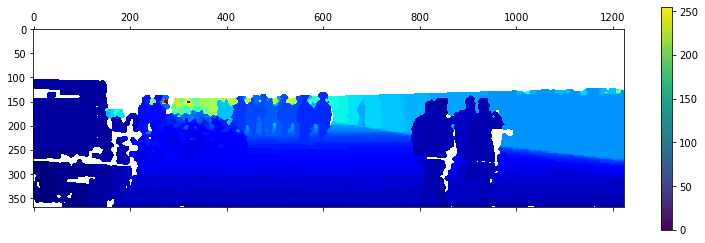

In [23]:
velo_img = depth_read(velodine_depth_list[0])
#plt.imshow(velo_img)
vis = display(velo_img)